In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go 
import plotly.express as px
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py

from sklearn.preprocessing import MinMaxScaler

#importing packages for the prediction of time-series data
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX



from scipy import stats
from itertools import product

import warnings
warnings.filterwarnings('ignore')


from collections import Counter
import re
from sklearn.metrics import mean_squared_error

import math

In [2]:
close=pd.read_csv('data/close.csv')
adj_close=pd.read_csv('data/adj_close.csv')
open=pd.read_csv('data/open.csv')
high=pd.read_csv('data/open.csv')
low=pd.read_csv('data/low.csv')
volume=pd.read_csv('data/volume.csv')

In [3]:
close=pd.read_csv('data_updated/close.csv')
adj_close=pd.read_csv('data_updated/adj_close.csv')
open=pd.read_csv('data_updated/open.csv')
high=pd.read_csv('data_updated/open.csv')
low=pd.read_csv('data_updated/low.csv')
volume=pd.read_csv('data_updated/volume.csv')

In [4]:
close

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
0,2017-05-09,NaN,NaN,NaN,NaN,1755.359985,NaN,NaN,NaN,NaN,NaN
1,2017-05-10,NaN,NaN,NaN,NaN,1787.130005,NaN,NaN,NaN,NaN,NaN
2,2017-05-11,NaN,NaN,NaN,NaN,1848.569946,NaN,NaN,NaN,NaN,NaN
3,2017-05-12,NaN,NaN,NaN,NaN,1724.239990,NaN,NaN,NaN,NaN,NaN
4,2017-05-13,NaN,NaN,NaN,NaN,1804.910034,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-05-04,0.896942,19.876862,67.086105,33.363853,39698.371094,2940.644775,12.145610,86.172264,1.171032,92.770851
1822,2022-05-05,0.791152,17.853285,59.127441,28.984409,36575.140625,2749.213135,10.917400,82.580406,1.064691,84.596024
1823,2022-05-06,0.783359,17.674110,57.034325,28.462557,36040.921875,2694.979736,10.799844,77.464806,1.044133,81.764107
1824,2022-05-07,0.761882,16.475998,55.156693,28.750196,35501.953125,2636.093018,10.239905,68.249123,1.021204,78.983421


In [5]:
from functools import reduce
dataframes = [close, adj_close, open, high, low, volume]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), dataframes)

In [6]:
df_merged

,Date,ADA-USD_x,ATOM-USD_x,AVAX-USD_x,AXS-USD_x,BTC-USD_x,ETH-USD_x,LINK-USD_x,LUNA1-USD_x,MATIC-USD_x,...,ADA-USD_y,ATOM-USD_y,AVAX-USD_y,AXS-USD_y,BTC-USD_y,ETH-USD_y,LINK-USD_y,LUNA1-USD_y,MATIC-USD_y,SOL-USD_y
0,2017-05-09,NaN,NaN,NaN,NaN,1755.359985,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1167920000,NaN,NaN,NaN,NaN,NaN
1,2017-05-10,NaN,NaN,NaN,NaN,1787.130005,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,915723008,NaN,NaN,NaN,NaN,NaN
2,2017-05-11,NaN,NaN,NaN,NaN,1848.569946,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,799489984,NaN,NaN,NaN,NaN,NaN
3,2017-05-12,NaN,NaN,NaN,NaN,1724.239990,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,740984000,NaN,NaN,NaN,NaN,NaN
4,2017-05-13,NaN,NaN,NaN,NaN,1804.910034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,579635008,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-05-04,0.896942,19.876862,67.086105,33.363853,39698.371094,2940.644775,12.145610,86.172264,1.171032,...,1.516023e+09,549565214.0,8.757237e+08,379974515.0,36754404490,1.818675e+10,501855323.0,1.941975e+09,742971942.0,1.428455e+09
1822,2022-05-05,0.791152,17.853285,59.127441,28.984409,36575.140625,2749.213135,10.917400,82.580406,1.064691,...,1.802129e+09,614325972.0,1.259826e+09,488287918.0,43106256317,2.264293e+10,560835165.0,2.276428e+09,759187845.0,1.805979e+09
1823,2022-05-06,0.783359,17.674110,57.034325,28.462557,36040.921875,2694.979736,10.799844,77.464806,1.044133,...,1.312284e+09,447936108.0,8.872802e+08,279097266.0,37795577489,2.102760e+10,507557055.0,2.178574e+09,704670768.0,1.585082e+09
1824,2022-05-07,0.761882,16.475998,55.156693,28.750196,35501.953125,2636.093018,10.239905,68.249123,1.021204,...,8.015589e+08,455478758.0,5.551183e+08,233434007.0,24375896406,1.336928e+10,354478668.0,3.054300e+09,618880005.0,1.139093e+09


In [7]:
def currency(curr): 
    df=df_merged[['Date',curr+'_x', curr+'_y']]
    df.columns = ['Date','Close', 'Adj_Close','Open','High', 'Low', 'Volume']
    df = df.dropna()
    df = df.reset_index(drop=True)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.name=curr
    return df

In [8]:
ADA=currency('ADA-USD')
ATOM=currency('ATOM-USD')
AVAX=currency('AVAX-USD')
AXS=currency('AXS-USD')
BTC=currency('BTC-USD')
ETH=currency('ETH-USD')
LINK=currency('LINK-USD')
LUNA1=currency('LUNA1-USD')
MATIC=currency('MATIC-USD')
SOL=currency('SOL-USD')

In [9]:
SOL

,Date,Close,Adj_Close,Open,High,Low,Volume
0,2020-04-10,0.951054,0.832005,0.694187,0.951054,0.832005,8.736428e+07
1,2020-04-11,0.776819,0.951054,0.765020,0.776819,0.951054,4.386244e+07
2,2020-04-12,0.882507,0.785448,0.762426,0.882507,0.785448,3.873690e+07
3,2020-04-13,0.777832,0.890760,0.773976,0.777832,0.890760,1.821128e+07
4,2020-04-14,0.661925,0.777832,0.628169,0.661925,0.777832,1.674761e+07
...,...,...,...,...,...,...,...
754,2022-05-04,92.770851,85.841728,85.728065,92.770851,85.841728,1.428455e+09
755,2022-05-05,84.596024,92.769791,81.834869,84.596024,92.769791,1.805979e+09
756,2022-05-06,81.764107,84.588493,80.468613,81.764107,84.588493,1.585082e+09
757,2022-05-07,78.983421,81.766670,77.883232,78.983421,81.766670,1.139093e+09


In [10]:
scaler= MinMaxScaler().fit(close[['ADA-USD','ATOM-USD','AVAX-USD','AXS-USD','BTC-USD','ETH-USD','LINK-USD','LUNA1-USD',
                                  'MATIC-USD','SOL-USD']])
closescaled = scaler.transform(close[['ADA-USD','ATOM-USD','AVAX-USD','AXS-USD','BTC-USD','ETH-USD','LINK-USD','LUNA1-USD',
                                  'MATIC-USD','SOL-USD']])
close[['ADA-USD','ATOM-USD','AVAX-USD','AXS-USD','BTC-USD','ETH-USD','LINK-USD','LUNA1-USD',
                                  'MATIC-USD','SOL-USD']] = closescaled
close.head()

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
0,2017-05-09,NaN,NaN,NaN,NaN,0.000473,NaN,NaN,NaN,NaN,NaN
1,2017-05-10,NaN,NaN,NaN,NaN,0.000955,NaN,NaN,NaN,NaN,NaN
2,2017-05-11,NaN,NaN,NaN,NaN,0.001888,NaN,NaN,NaN,NaN,NaN
3,2017-05-12,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
4,2017-05-13,NaN,NaN,NaN,NaN,0.001225,NaN,NaN,NaN,NaN,NaN


In [11]:
trace1 = dict(type='scatter',
                  x=close['Date'],
                  y=close['ADA-USD'],
                  name='ADA'
                  )

trace2 = dict(type='scatter',
                  x=close['Date'],
                  y=close['AVAX-USD'],
                  name='AVAX'
                  )

trace3 = dict(type='scatter',
                  x=close['Date'],
                  y=close['ATOM-USD'],
                  name='ATOM'
                  )

trace4 = dict(type='scatter',
                  x=close['Date'],
                  y=close['AXS-USD'],
                  name='AXS'
                  )


trace5 = dict(type='scatter',
                  x=close['Date'],
                  y=close['ETH-USD'],
                  name='ETH'
                  )
trace6 = dict(type='scatter',
                  x=close['Date'],
                  y=close['LINK-USD'],
                  name='LINK'
                  )
trace7 = dict(type='scatter',
                  x=close['Date'],
                  y=close['LUNA1-USD'],
                  name='LUNA1'
                  )

trace8 = dict(type='scatter',
                  x=close['Date'],
                  y=close['MATIC-USD'],
                  name='MATIC'
                  )
trace9 = dict(type='scatter',
                  x=close['Date'],
                  y=close['SOL-USD'],
                  name='SOL'
                  )
trace10= dict(type='scatter',
                  x=close['Date'],
                  y=close['BTC-USD'],
                  name='BTC'
                  )

data = [trace1, trace2,trace3, trace4,  trace5, trace6, trace7, trace8, trace9, trace10 ]

layout = dict(title=dict(text='Close currency price during 2017 and 2022'),
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Close currency price')
                  )

fig = go.Figure(data=data, layout=layout)

fig.show(renderer='iframe')

In [12]:
def graphs(df): 
    trace1 = dict(type='scatter',
                  x=df['Date'],
                  y=df['Close'],
                  name='Close'
                  )

    trace2 = dict(type='scatter',
                  x=df['Date'],
                  y=df['Open'],
                  name='Open'
                  )

    trace3 = dict(type='scatter',
                  x=df['Date'],
                  y=df['High'],
                  name='High'
                  )

    trace4 = dict(type='scatter',
                  x=df['Date'],
                  y=df['Low'],
                  name='Low'
                  )

    data = [trace1, trace2,trace3, trace4]

    layout = dict(title=dict(text=df.name +' Price During 2017 and 2022'),
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='Currency Price')
                      )

    fig = go.Figure(data=data, layout=layout)

    return fig.show(renderer='iframe')

In [13]:
#currencies=[ADA, ATOM, AVAX, AXS, BTC, ETH, LINK, LUNA1, MATIC,SOL]
#for i in currencies: 
#    graphs(i)

In [14]:
graphs(ADA)

In [15]:
graphs(BTC)

In [16]:
#Volume

#In simple words, Volume is the amount of a token traded in a specific time interval.

### Candlestick

In [17]:
def candlestick(df): 
    data = [go.Candlestick(x=df.Date,
                           open=df.Open,
                           high=df.High,
                           low=df.Low,
                           close=df.Close)]
    layout = go.Layout(title=df.name+' Candlestick')
    fig = go.Figure(data=data, layout=layout)
    return fig.show(renderer='iframe')

In [18]:
#currencies=[ADA, ATOM, AVAX, AXS, BTC, ETH, LINK, LUNA1, MATIC,SOL]
#for i in currencies: 
#    candlestick(i)

In [19]:
candlestick(BTC)

In [20]:
candlestick(ETH)

## BTC ARIMA Model: 

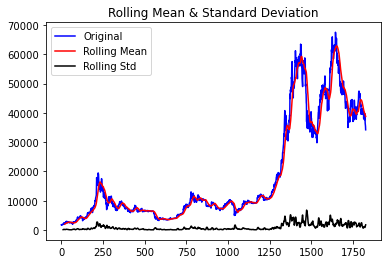

ADF Stastistic: -1.272677
p-value: 0.641578
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [21]:
def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
        if result[0]>value:
            print("The graph is non stationery")
            break
        
        else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = BTC['Close']      
test_stationarity(ts)

Since the p value is greater than 0.05 the time series is non stationary.

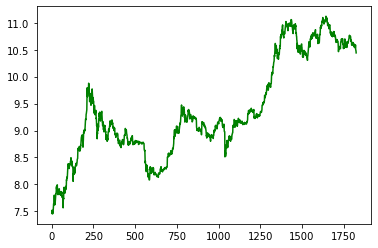

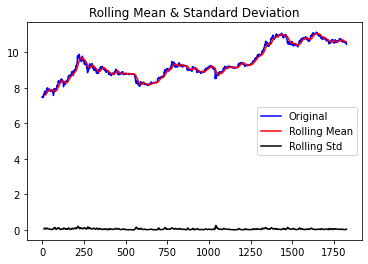

ADF Stastistic: -1.710726
p-value: 0.425595
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [22]:
ts_log = np.log(ts)
plt.plot(ts_log,color="green")
plt.show()

test_stationarity(ts_log)

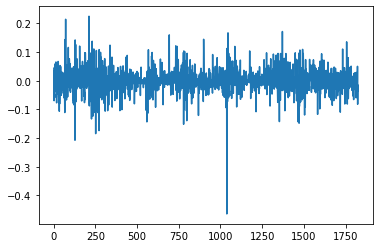

In [23]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

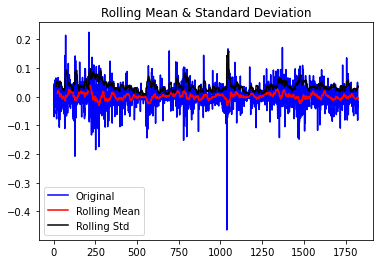

ADF Stastistic: -44.113363
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [24]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

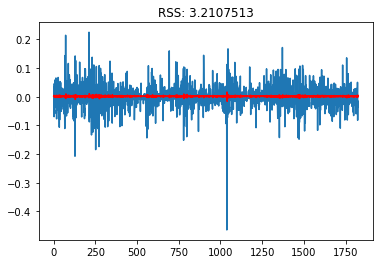

In [25]:
model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()

In [26]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ts_log, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [27]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
0     (0, 0) -6388.154484
3     (1, 0) -6387.968057
1     (0, 1) -6387.856192
2     (0, 2) -6387.823549
6     (2, 0) -6387.787914


In [28]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1826
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3195.077
Date:                Mon, 09 May 2022   AIC                          -6388.154
Time:                        13:08:04   BIC                          -6382.645
Sample:                             0   HQIC                         -6386.122
                               - 1826                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0018   2.32e-05     76.012      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):              8991.83
Prob(Q):                              0.16   Pr

Printing Predicted vs Expected Values...


predicted = 37851.619933,   expected = 38138.179687,   error = 0.751372  %
predicted = 38206.264697,   expected = 37917.601562,   error = 0.761291  %
predicted = 37985.125970,   expected = 38483.125000,   error = 1.294071  %
predicted = 38551.947094,   expected = 38743.273437,   error = 0.493831  %
predicted = 38812.671904,   expected = 36952.984375,   error = 5.032577  %
predicted = 37018.125360,   expected = 37154.601562,   error = 0.367320  %
predicted = 37220.177086,   expected = 41500.875000,   error = 10.314717  %
predicted = 41576.734604,   expected = 41441.164063,   error = 0.327140  %
predicted = 41516.836278,   expected = 42412.433594,   error = 2.111639  %
predicted = 42490.402341,   expected = 43840.285156,   error = 3.079092  %
predicted = 43921.670511,   expected = 44118.445313,   error = 0.446015  %
predicted = 44200.460858,   expected = 44338.796875,   error = 0.311998  %
predicted = 44421.301966,   expected = 43565.113281,   e

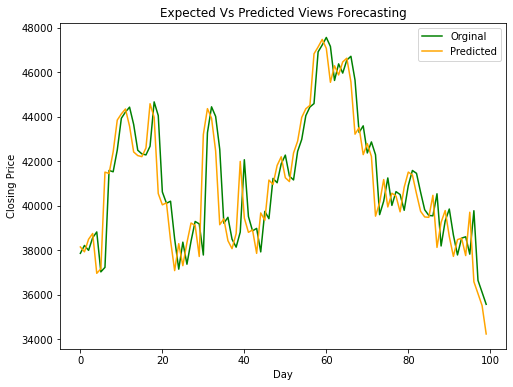

In [29]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(0, 1, 0))
    model_fit = model.fit(disp=-1)

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_arima[t+size]
    history.append(original_value)

    pred_value = np.exp(pred_value)

    original_value = np.exp(original_value)

    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [30]:
RMSE_SCORES=[]
RMSE_BTC=math.sqrt(mean_squared_error(originals,predictions))
RMSE_SCORES.append(RMSE_BTC)
RMSE_BTC

1387.3442996425804

In [31]:
testdf = pd.DataFrame()
testdf['y_test'] = originals
testdf['predict'] = predictions
testdf

,y_test,predict
0,38138.179687,37851.619933
1,37917.601562,38206.264697
2,38483.125000,37985.125970
3,38743.273437,38551.947094
4,36952.984375,38812.671904
...,...,...
95,39698.371094,37814.149965
96,36575.140625,39766.416562
97,36040.921875,36636.150559
98,35501.953125,36100.716313


In [32]:
predictions = pd.DataFrame(predictions,index = test_arima.index,columns=['Prediction'])
BTC['Prediction']=predictions

In [33]:
def plot(df): 
    trace1 = dict(type='scatter',
                      x=df['Date'],
                      y=df['Close'],
                      name='Actual Values'
                      )

    trace2 = dict(type='scatter',
                      x=df['Date'],
                      y=df['Prediction'],
                      name='Predictions'
                      )


    data = [trace1, trace2 ]

    layout = dict(title=dict(text='Predictions VS Actual for ' + df.name),
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='Close currency price')
                      )

    fig = go.Figure(data=data, layout=layout)

    fig.show(renderer='iframe')

In [34]:
plot(BTC)

In [35]:
#Predicting the next 2 days: 
next_days=[]
pred = model_fit.forecast(3)
next_BTC=list(np.exp(pred[0][1:]))
next_days.append(next_BTC)
next_days

[[35619.19812621678, 35677.965747363196]]

## ETH ARIMA

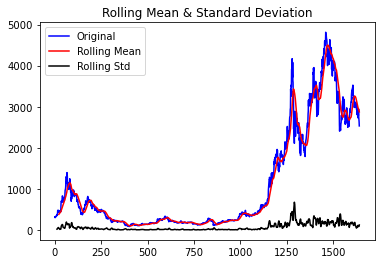

ADF Stastistic: -0.913483
p-value: 0.783500
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [36]:
ts = ETH['Close']      
test_stationarity(ts)

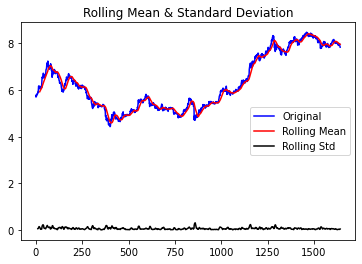

ADF Stastistic: -0.595325
p-value: 0.872035
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [37]:
ts_log = np.log(ts)
test_stationarity(ts_log)

In [38]:
ts_log_diff = ts_log - ts_log.shift()

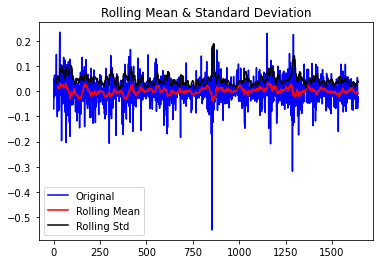

ADF Stastistic: -12.049454
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [39]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [40]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ts_log, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [41]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
8     (2, 2) -5067.229647
7     (2, 1) -5067.178449
4     (1, 1) -5067.047081
6     (2, 0) -5066.568015
2     (0, 2) -5066.353496


In [42]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1642
Model:               SARIMAX(2, 1, 2)   Log Likelihood                2538.615
Date:                Mon, 09 May 2022   AIC                          -5067.230
Time:                        13:08:15   BIC                          -5040.214
Sample:                             0   HQIC                         -5057.211
                               - 1642                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1101      0.125      0.879      0.380      -0.135       0.356
ar.L2          0.7013      0.132      5.300      0.000       0.442       0.961
ma.L1         -0.1400      0.135     -1.037      0.3

Printing Predicted vs Expected Values...


predicted = 2537.405653,   expected = 2597.084717,   error = 2.297925  %
predicted = 2599.422596,   expected = 2603.466553,   error = 0.155330  %
predicted = 2601.577095,   expected = 2688.278809,   error = 3.225176  %
predicted = 2687.885329,   expected = 2792.117188,   error = 3.733076  %
predicted = 2794.480315,   expected = 2682.854004,   error = 4.160730  %
predicted = 2694.226199,   expected = 2679.162598,   error = 0.562250  %
predicted = 2675.552630,   expected = 2983.586914,   error = 10.324294  %
predicted = 2981.018854,   expected = 3014.648193,   error = 1.115531  %
predicted = 3034.172992,   expected = 3057.476074,   error = 0.762167  %
predicted = 3060.463104,   expected = 3142.470703,   error = 2.609654  %
predicted = 3156.914611,   expected = 3122.608643,   error = 1.098632  %
predicted = 3134.113185,   expected = 3239.457031,   error = 3.251898  %
predicted = 3246.148924,   expected = 3077.482178,   error = 5.480673  %
predict

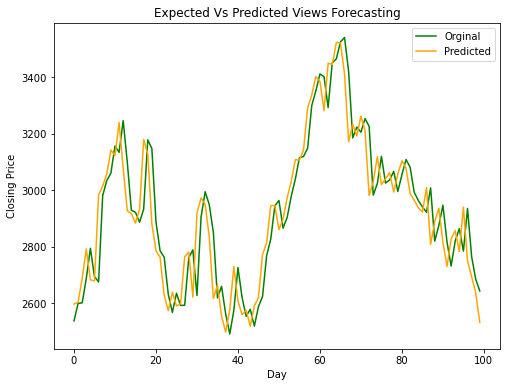

In [43]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 2))
    model_fit = model.fit(disp=-1)

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_arima[t+size]
    history.append(original_value)

    pred_value = np.exp(pred_value)

    original_value = np.exp(original_value)

    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [44]:
RMSE_ETH=math.sqrt(mean_squared_error(originals,predictions))
RMSE_SCORES.append(RMSE_ETH)
RMSE_ETH

108.54523512287197

In [45]:
predictions = pd.DataFrame(predictions,index = test_arima.index,columns=['Prediction'])
ETH['Prediction']=predictions

In [46]:
ETH

,Date,Close,Adj_Close,Open,High,Low,Volume,Prediction
0,2017-11-09,320.884003,308.644989,307.056000,320.884003,308.644989,8.932500e+08,NaN
1,2017-11-10,299.252991,320.670990,294.541992,299.252991,320.670990,8.859860e+08,NaN
2,2017-11-11,314.681000,298.585999,298.191986,314.681000,298.585999,8.423010e+08,NaN
3,2017-11-12,307.907990,314.690002,298.513000,307.907990,314.690002,1.613480e+09,NaN
4,2017-11-13,316.716003,307.024994,307.024994,316.716003,307.024994,1.041890e+09,NaN
...,...,...,...,...,...,...,...,...
1637,2022-05-04,2940.644775,2783.131104,2779.273682,2940.644775,2783.131104,1.818675e+10,2784.604362
1638,2022-05-05,2749.213135,2940.226562,2704.916260,2749.213135,2940.226562,2.264293e+10,2935.737197
1639,2022-05-06,2694.979736,2748.931641,2645.335205,2694.979736,2748.931641,2.102760e+10,2765.752426
1640,2022-05-07,2636.093018,2694.991943,2599.523438,2636.093018,2694.991943,1.336928e+10,2685.122667


In [47]:
plot(ETH)

In [48]:
#Predicting the next 2 days: 
pred = model_fit.forecast(3)
next_ETH=list(np.exp(pred[0][1:]))
next_days.append(next_ETH)

## ADA ARIMA

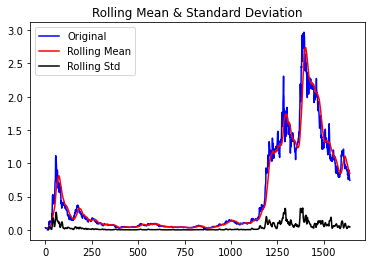

ADF Stastistic: -1.773855
p-value: 0.393517
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [49]:
ts = ADA['Close']      
test_stationarity(ts)

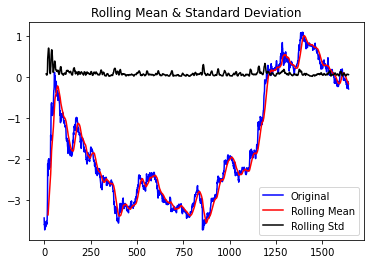

ADF Stastistic: -1.445967
p-value: 0.560052
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [50]:
ts_log = np.log(ts)
test_stationarity(ts_log)

In [51]:
ts_log_diff = ts_log - ts_log.shift()

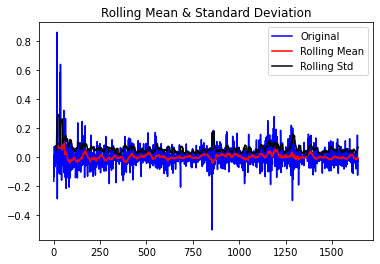

ADF Stastistic: -7.276555
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [52]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [53]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ts_log, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [54]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
5     (1, 2) -4117.314244
7     (2, 1) -4116.466140
8     (2, 2) -4115.368189
6     (2, 0) -4111.113097
2     (0, 2) -4110.194898


In [55]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1642
Model:               SARIMAX(1, 1, 2)   Log Likelihood                2062.657
Date:                Mon, 09 May 2022   AIC                          -4117.314
Time:                        13:09:32   BIC                          -4095.702
Sample:                             0   HQIC                         -4109.299
                               - 1642                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5032      0.097      5.180      0.000       0.313       0.694
ma.L1         -0.5276      0.099     -5.325      0.000      -0.722      -0.333
ma.L2          0.1424      0.014     10.092      0.0

Printing Predicted vs Expected Values...


predicted = 1.049803,   expected = 1.059570,   error = 0.921757  %
predicted = 1.060463,   expected = 1.037473,   error = 2.215975  %
predicted = 1.040948,   expected = 1.052303,   error = 1.079068  %
predicted = 1.051690,   expected = 1.088624,   error = 3.392766  %
predicted = 1.090417,   expected = 1.028906,   error = 5.978329  %
predicted = 1.037310,   expected = 1.056444,   error = 1.811166  %
predicted = 1.052698,   expected = 1.135624,   error = 7.302227  %
predicted = 1.136000,   expected = 1.127345,   error = 0.767720  %
predicted = 1.141251,   expected = 1.144547,   error = 0.288010  %
predicted = 1.151480,   expected = 1.197307,   error = 3.827480  %
predicted = 1.201731,   expected = 1.178720,   error = 1.952213  %
predicted = 1.189333,   expected = 1.194810,   error = 0.458374  %
predicted = 1.198072,   expected = 1.152478,   error = 3.956202  %
predicted = 1.157118,   expected = 1.080347,   error = 7.106158  %
predicted = 1.07937

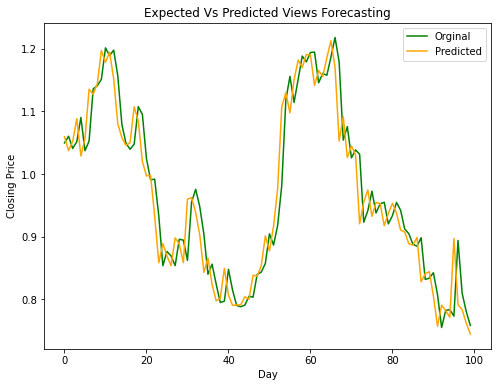

In [56]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 2))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t+size]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [57]:
RMSE_ADA=math.sqrt(mean_squared_error(originals,predictions))
RMSE_SCORES.append(RMSE_ADA)
RMSE_ADA

0.04350841448132493

In [58]:
predictions = pd.DataFrame(predictions,index = test_arima.index,columns=['Prediction'])
ADA['Prediction']=predictions

In [59]:
plot(ADA)

In [60]:
#Predicting the next 2 days: 
pred = model_fit.forecast(3)
next_ADA=list(np.exp(pred[0][1:]))
next_days.append(next_ADA)

## AVAX ARIMA

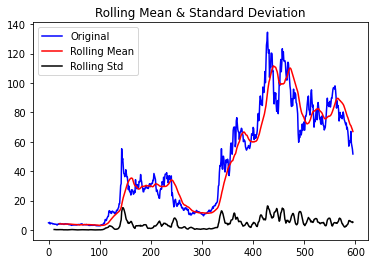

ADF Stastistic: -1.561142
p-value: 0.503078
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.866 
	10%: -2.569 


In [61]:
ts = AVAX['Close']      
test_stationarity(ts)

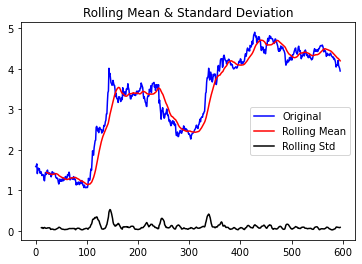

ADF Stastistic: -1.578210
p-value: 0.494529
The graph is non stationery
Critical values:
	1%: -3.441 
	5%: -2.866 
	10%: -2.569 


In [62]:
ts_log = np.log(ts)
test_stationarity(ts_log)

In [63]:
ts_log_diff = ts_log - ts_log.shift()

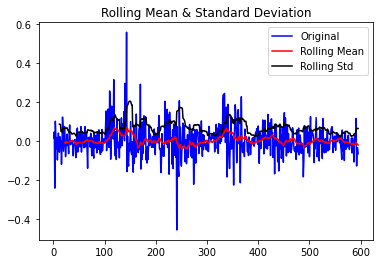

ADF Stastistic: -12.208243
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.441 
	5%: -2.866 
	10%: -2.569 


In [64]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [65]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ts_log, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [66]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
5     (1, 2) -1307.659898
7     (2, 1) -1307.348805
8     (2, 2) -1306.194543
0     (0, 0) -1305.902577
3     (1, 0) -1303.904305


In [67]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  596
Model:               SARIMAX(1, 1, 2)   Log Likelihood                 657.830
Date:                Mon, 09 May 2022   AIC                          -1307.660
Time:                        13:10:01   BIC                          -1290.106
Sample:                             0   HQIC                         -1300.824
                                - 596                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8086      0.116      6.978      0.000       0.582       1.036
ma.L1         -0.8244      0.120     -6.858      0.000      -1.060      -0.589
ma.L2          0.0806      0.038      2.113      0.0

Printing Predicted vs Expected Values...


predicted = 67.156621,   expected = 72.120277,   error = 6.882470  %
predicted = 72.355821,   expected = 67.973785,   error = 6.446655  %
predicted = 68.752781,   expected = 69.992424,   error = 1.771111  %
predicted = 70.274366,   expected = 73.448814,   error = 4.321988  %
predicted = 73.817763,   expected = 67.879974,   error = 8.747482  %
predicted = 68.629528,   expected = 68.107719,   error = 0.766153  %
predicted = 68.254362,   expected = 77.311638,   error = 11.715281  %
predicted = 77.261377,   expected = 77.249489,   error = 0.015389  %
predicted = 78.191115,   expected = 78.757263,   error = 0.718852  %
predicted = 79.592049,   expected = 83.167000,   error = 4.298520  %
predicted = 83.934590,   expected = 86.624199,   error = 3.104916  %
predicted = 87.654475,   expected = 90.020866,   error = 2.628714  %
predicted = 91.188757,   expected = 91.136223,   error = 0.057644  %
predicted = 92.407781,   expected = 81.732994,   error = 13

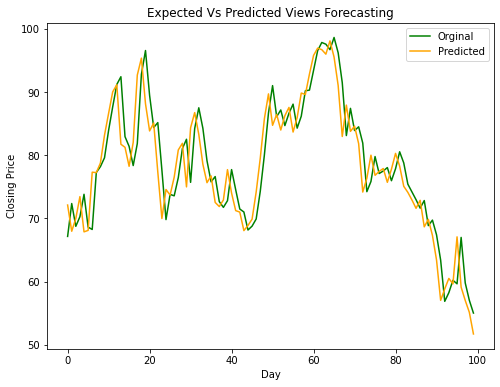

In [68]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 2))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t+size]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [69]:
RMSE_AVAX=math.sqrt(mean_squared_error(originals,predictions))
RMSE_SCORES.append(RMSE_AVAX)
RMSE_AVAX

4.150874147061756

In [70]:
predictions = pd.DataFrame(predictions,index = test_arima.index,columns=['Prediction'])
AVAX['Prediction']=predictions

In [71]:
plot(AVAX)

In [72]:
#Predicting the next 2 days: 
pred = model_fit.forecast(3)
next_AVAX=list(np.exp(pred[0][1:]))
next_days.append(next_AVAX)

## AXS ARIMA

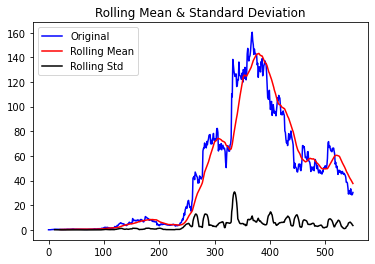

ADF Stastistic: -1.250240
p-value: 0.651619
The graph is non stationery
Critical values:
	1%: -3.443 
	5%: -2.867 
	10%: -2.570 


In [73]:
ts = AXS['Close']      
test_stationarity(ts)

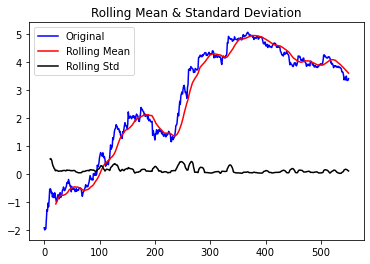

ADF Stastistic: -1.878750
p-value: 0.342123
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


In [74]:
ts_log = np.log(ts)
test_stationarity(ts_log)

In [75]:
ts_log_diff = ts_log - ts_log.shift()

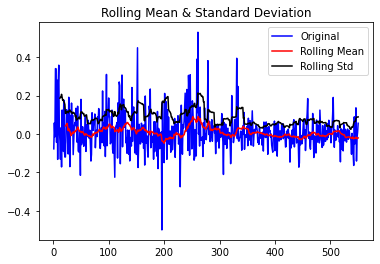

ADF Stastistic: -7.731009
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


In [76]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [77]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ts_log, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [78]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
4     (1, 1) -964.546016
5     (1, 2) -963.940125
7     (2, 1) -963.521849
8     (2, 2) -961.947134
6     (2, 0) -961.836088


In [79]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  551
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 485.273
Date:                Mon, 09 May 2022   AIC                           -964.546
Time:                        13:10:33   BIC                           -951.616
Sample:                             0   HQIC                          -959.493
                                - 551                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9772      0.024     40.618      0.000       0.930       1.024
ma.L1         -0.9520      0.033    -28.533      0.000      -1.017      -0.887
sigma2         0.0100      0.000     25.658      0.0

Printing Predicted vs Expected Values...


predicted = 47.605842,   expected = 49.574665,   error = 3.971429  %
predicted = 50.146143,   expected = 53.355972,   error = 6.015876  %
predicted = 53.995531,   expected = 52.277939,   error = 3.285501  %
predicted = 53.056831,   expected = 53.484989,   error = 0.800520  %
predicted = 54.109919,   expected = 49.082935,   error = 10.241815  %
predicted = 49.923414,   expected = 48.087044,   error = 3.818846  %
predicted = 48.637966,   expected = 51.230080,   error = 5.059749  %
predicted = 51.844383,   expected = 56.892429,   error = 8.872966  %
predicted = 57.495492,   expected = 68.421082,   error = 15.968162  %
predicted = 69.074737,   expected = 68.339729,   error = 1.075520  %
predicted = 69.453950,   expected = 66.851303,   error = 3.893187  %
predicted = 67.707970,   expected = 67.550362,   error = 0.233320  %
predicted = 68.483250,   expected = 63.470455,   error = 7.897840  %
predicted = 64.442727,   expected = 58.651875,   error = 9

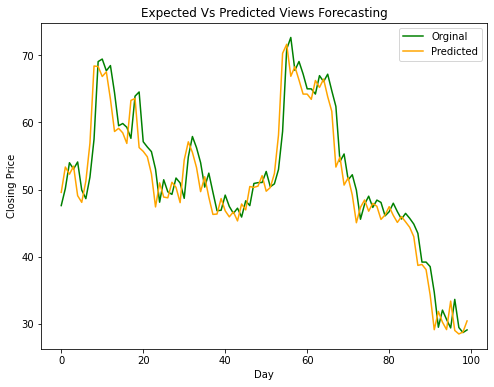

In [80]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t+size]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [81]:
RMSE_AXS=math.sqrt(mean_squared_error(originals,predictions))
RMSE_SCORES.append(RMSE_AXS)
RMSE_AXS

3.3496783709388116

In [82]:
predictions = pd.DataFrame(predictions,index = test_arima.index,columns=['Prediction'])
AXS['Prediction']=predictions

In [83]:
plot(AXS)

In [84]:
#Predicting the next 2 days: 
pred = model_fit.forecast(3)
next_AXS=list(np.exp(pred[0][1:]))
next_days.append(next_AXS)

## ATOM ARIMA

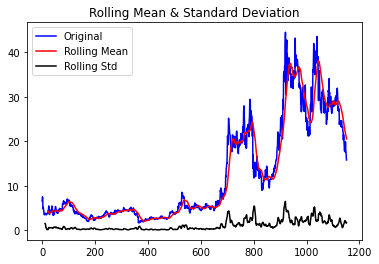

ADF Stastistic: -1.429651
p-value: 0.567981
The graph is non stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [85]:
ts = ATOM['Close']      
test_stationarity(ts)

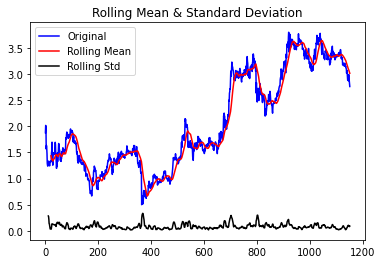

ADF Stastistic: -1.154147
p-value: 0.693003
The graph is non stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [86]:
ts_log = np.log(ts)
test_stationarity(ts_log)

In [87]:
ts_log_diff = ts_log - ts_log.shift()

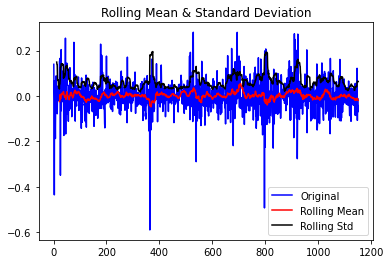

ADF Stastistic: -15.388022
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [88]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [89]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ts_log, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [90]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
1     (0, 1) -2780.698486
3     (1, 0) -2780.219678
6     (2, 0) -2779.218178
2     (0, 2) -2779.116855
4     (1, 1) -2779.005713


In [91]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1152
Model:               SARIMAX(0, 1, 1)   Log Likelihood                1392.349
Date:                Mon, 09 May 2022   AIC                          -2780.698
Time:                        13:10:54   BIC                          -2770.602
Sample:                             0   HQIC                         -2776.887
                               - 1152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0929      0.025     -3.692      0.000      -0.142      -0.044
sigma2         0.0052   9.69e-05     53.746      0.000       0.005       0.005
Ljung-Box (L1) (Q):                   0.00   Jarque-

Printing Predicted vs Expected Values...


predicted = 29.578691,   expected = 29.065109,   error = 1.767003  %
predicted = 29.151263,   expected = 27.159294,   error = 7.334391  %
predicted = 27.366306,   expected = 28.137527,   error = 2.740900  %
predicted = 28.106955,   expected = 28.936157,   error = 2.865628  %
predicted = 28.902191,   expected = 26.375572,   error = 9.579388  %
predicted = 26.626254,   expected = 29.481501,   error = 9.684875  %
predicted = 29.252039,   expected = 31.032976,   error = 5.738855  %
predicted = 30.914296,   expected = 30.798967,   error = 0.374457  %
predicted = 30.854119,   expected = 31.251080,   error = 1.270231  %
predicted = 31.261043,   expected = 31.674353,   error = 1.304871  %
predicted = 31.683825,   expected = 30.480455,   error = 3.948006  %
predicted = 30.630731,   expected = 30.902407,   error = 0.879141  %
predicted = 30.922746,   expected = 29.139057,   error = 6.121300  %
predicted = 29.336092,   expected = 26.549461,   error = 10.

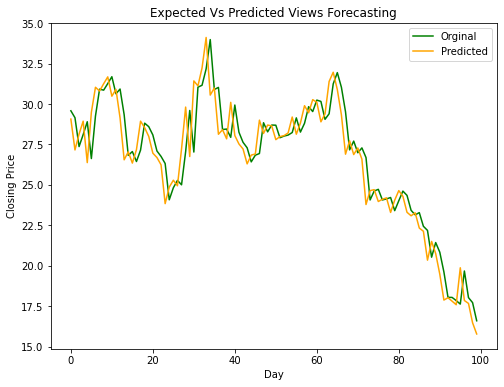

In [92]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(0, 1, 1))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t+size]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [93]:
RMSE_ATOM=math.sqrt(mean_squared_error(originals,predictions))
RMSE_SCORES.append(RMSE_ATOM)
RMSE_ATOM

1.3688538276675104

In [94]:
predictions = pd.DataFrame(predictions,index = test_arima.index,columns=['Prediction'])
ATOM['Prediction']=predictions

In [95]:
plot(ATOM)

In [96]:
#Predicting the next 2 days: 
pred = model_fit.forecast(3)
next_ATOM=list(np.exp(pred[0][1:]))
next_days.append(next_ATOM)

## LINK ARIMA

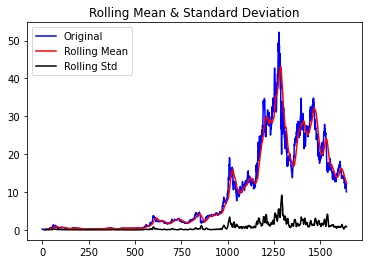

ADF Stastistic: -1.638338
p-value: 0.463129
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [97]:
ts = LINK['Close']      
test_stationarity(ts)

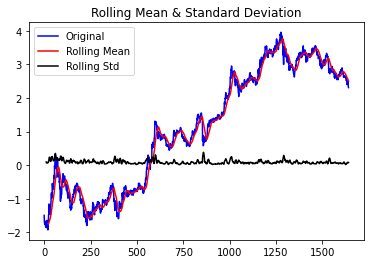

ADF Stastistic: -1.519347
p-value: 0.523920
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [98]:
ts_log = np.log(ts)
test_stationarity(ts_log)

In [99]:
ts_log_diff = ts_log - ts_log.shift()

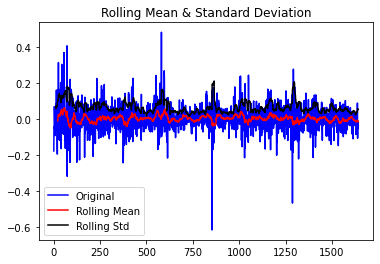

ADF Stastistic: -18.835714
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [100]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [101]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ts_log, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [102]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
5     (1, 2) -3942.765961
7     (2, 1) -3942.382545
2     (0, 2) -3941.327360
8     (2, 2) -3941.277861
3     (1, 0) -3940.891609


In [103]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1642
Model:               SARIMAX(1, 1, 2)   Log Likelihood                1975.383
Date:                Mon, 09 May 2022   AIC                          -3942.766
Time:                        13:11:05   BIC                          -3921.154
Sample:                             0   HQIC                         -3934.751
                               - 1642                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5905      0.202      2.926      0.003       0.195       0.986
ma.L1         -0.6564      0.201     -3.272      0.001      -1.050      -0.263
ma.L2          0.0879      0.020      4.407      0.0

Printing Predicted vs Expected Values...


predicted = 16.065185,   expected = 16.205904,   error = 0.868319  %
predicted = 16.262154,   expected = 17.768534,   error = 8.477794  %
predicted = 17.728962,   expected = 17.240427,   error = 2.833659  %
predicted = 17.402496,   expected = 17.024292,   error = 2.221554  %
predicted = 17.111306,   expected = 15.819188,   error = 8.168044  %
predicted = 15.943209,   expected = 16.178110,   error = 1.451966  %
predicted = 16.149098,   expected = 17.445440,   error = 7.430836  %
predicted = 17.391750,   expected = 17.802694,   error = 2.308328  %
predicted = 17.875772,   expected = 18.039454,   error = 0.907355  %
predicted = 18.119733,   expected = 18.876795,   error = 4.010542  %
predicted = 18.914950,   expected = 18.426355,   error = 2.651609  %
predicted = 18.567604,   expected = 18.642735,   error = 0.403001  %
predicted = 18.699246,   expected = 17.525623,   error = 6.696609  %
predicted = 17.663297,   expected = 16.184280,   error = 9.1

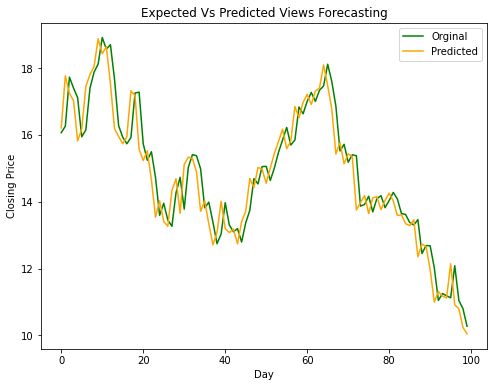

In [104]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t+size]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [105]:
RMSE_LINK=math.sqrt(mean_squared_error(originals,predictions))
RMSE_SCORES.append(RMSE_LINK)
RMSE_LINK

0.6773394457078887

In [106]:
predictions = pd.DataFrame(predictions,index = test_arima.index,columns=['Prediction'])
LINK['Prediction']=predictions

In [107]:
plot(LINK)

In [108]:
#Predicting the next 2 days: 
pred = model_fit.forecast(3)
next_LINK=list(np.exp(pred[0][1:]))
next_days.append(next_LINK)

## LUNA1 ARIMA

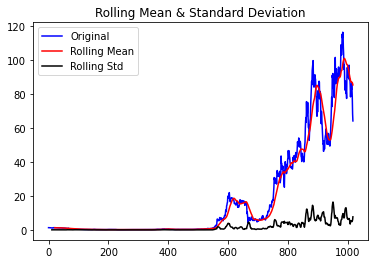

ADF Stastistic: -0.790743
p-value: 0.821826
The graph is non stationery
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [109]:
ts = LUNA1['Close']      
test_stationarity(ts)

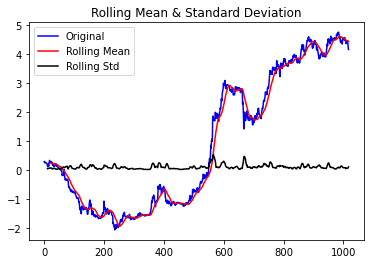

ADF Stastistic: -0.206379
p-value: 0.937757
The graph is non stationery
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [110]:
ts_log = np.log(ts)
test_stationarity(ts_log)

In [111]:
ts_log_diff = ts_log - ts_log.shift()

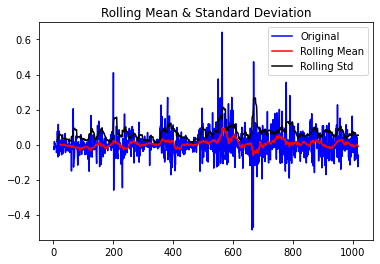

ADF Stastistic: -6.765467
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [112]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [113]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ts_log, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [114]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
8     (2, 2) -2306.365858
4     (1, 1) -2298.459343
5     (1, 2) -2297.994306
0     (0, 0) -2296.476773
6     (2, 0) -2295.902117


In [115]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1018
Model:               SARIMAX(2, 1, 2)   Log Likelihood                1158.183
Date:                Mon, 09 May 2022   AIC                          -2306.366
Time:                        13:11:49   BIC                          -2281.743
Sample:                             0   HQIC                         -2297.015
                               - 1018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1925      0.118      1.635      0.102      -0.038       0.423
ar.L2          0.7530      0.119      6.333      0.000       0.520       0.986
ma.L1         -0.2256      0.130     -1.735      0.0

Printing Predicted vs Expected Values...


predicted = 50.390019,   expected = 50.794754,   error = 0.796805  %
predicted = 50.320706,   expected = 46.273418,   error = 8.746464  %
predicted = 46.205772,   expected = 52.342789,   error = 11.724664  %
predicted = 51.399630,   expected = 52.023434,   error = 1.199082  %
predicted = 52.328371,   expected = 47.567959,   error = 10.007602  %
predicted = 47.133736,   expected = 51.031086,   error = 7.637207  %
predicted = 50.685321,   expected = 53.891132,   error = 5.948680  %
predicted = 53.681752,   expected = 55.374805,   error = 3.057443  %
predicted = 55.262414,   expected = 56.102280,   error = 1.497026  %
predicted = 56.027698,   expected = 59.469631,   error = 5.787716  %
predicted = 59.325036,   expected = 57.294228,   error = 3.544526  %
predicted = 57.550931,   expected = 57.289680,   error = 0.456016  %
predicted = 57.086575,   expected = 52.174263,   error = 9.415202  %
predicted = 52.477659,   expected = 50.388470,   error = 4

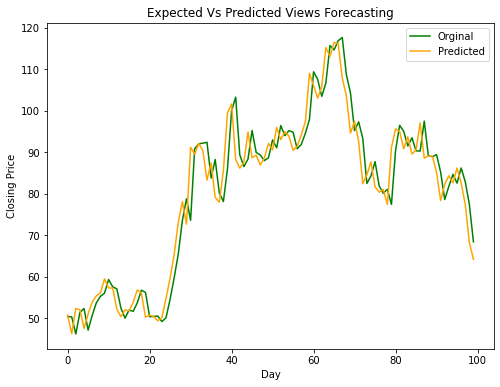

In [116]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 2))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t+size]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [117]:
RMSE_LUNA1=math.sqrt(mean_squared_error(originals,predictions))
RMSE_SCORES.append(RMSE_LUNA1)
RMSE_LUNA1

5.347420573040127

In [118]:
predictions = pd.DataFrame(predictions,index = test_arima.index,columns=['Prediction'])
LUNA1['Prediction']=predictions

In [119]:
plot(LUNA1)

In [120]:
#Predicting the next 2 days: 
pred = model_fit.forecast(3)
next_LUNA=list(np.exp(pred[0][1:]))
next_days.append(next_LUNA)

## MATIC ARIMA

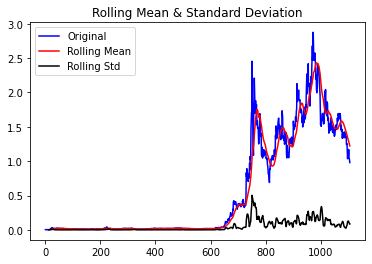

ADF Stastistic: -1.261966
p-value: 0.646388
The graph is non stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [121]:
ts = MATIC['Close']      
test_stationarity(ts)

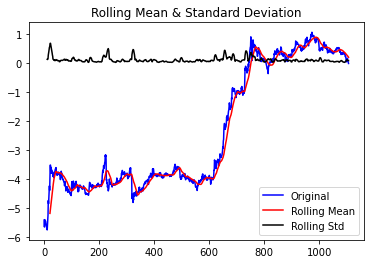

ADF Stastistic: -1.052333
p-value: 0.733702
The graph is non stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [122]:
ts_log = np.log(ts)
test_stationarity(ts_log)

In [123]:
ts_log_diff = ts_log - ts_log.shift()

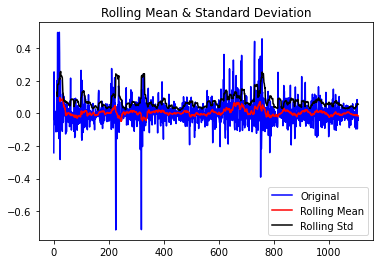

ADF Stastistic: -15.140694
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [124]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [125]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ts_log, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [126]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
8     (2, 2) -2253.578798
5     (1, 2) -2253.066489
4     (1, 1) -2250.348354
6     (2, 0) -2247.388803
2     (0, 2) -2245.989629


In [127]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1107
Model:               SARIMAX(2, 1, 2)   Log Likelihood                1131.789
Date:                Mon, 09 May 2022   AIC                          -2253.579
Time:                        13:13:26   BIC                          -2228.536
Sample:                             0   HQIC                         -2244.108
                               - 1107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2600      0.168     -1.551      0.121      -0.588       0.068
ar.L2          0.5092      0.171      2.974      0.003       0.174       0.845
ma.L1          0.2529      0.179      1.415      0.1

Printing Predicted vs Expected Values...


predicted = 1.694197,   expected = 1.694964,   error = 0.045240  %
predicted = 1.708771,   expected = 1.605330,   error = 6.443612  %
predicted = 1.616940,   expected = 1.643921,   error = 1.641242  %
predicted = 1.643856,   expected = 1.647593,   error = 0.226791  %
predicted = 1.664098,   expected = 1.541885,   error = 7.926174  %
predicted = 1.546063,   expected = 1.550246,   error = 0.269803  %
predicted = 1.551588,   expected = 1.690830,   error = 8.235106  %
predicted = 1.699943,   expected = 1.714360,   error = 0.840976  %
predicted = 1.735660,   expected = 1.739951,   error = 0.246606  %
predicted = 1.747820,   expected = 2.019142,   error = 13.437487  %
predicted = 2.036263,   expected = 1.948614,   error = 4.498007  %
predicted = 1.987309,   expected = 2.042768,   error = 2.714885  %
predicted = 2.039236,   expected = 1.895883,   error = 7.561298  %
predicted = 1.930992,   expected = 1.714621,   error = 12.619152  %
predicted = 1.701

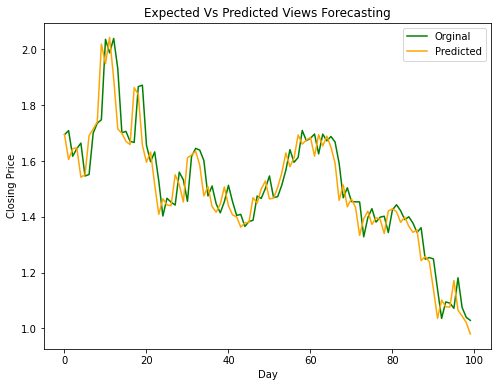

In [128]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 2))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t+size]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [129]:
RMSE_MATIC=math.sqrt(mean_squared_error(originals,predictions))
RMSE_SCORES.append(RMSE_MATIC)
RMSE_MATIC

0.0770366868104187

In [130]:
predictions = pd.DataFrame(predictions,index = test_arima.index,columns=['Prediction'])
MATIC['Prediction']=predictions

In [131]:
plot(MATIC)

In [132]:
#Predicting the next 2 days: 
pred = model_fit.forecast(3)
next_MATIC=list(np.exp(pred[0][1:]))
next_days.append(next_MATIC)

## SOL ARIMA

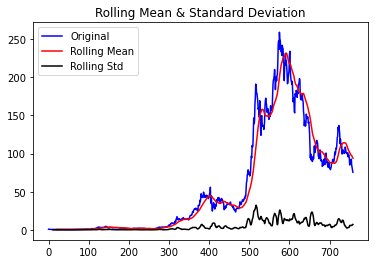

ADF Stastistic: -1.320830
p-value: 0.619590
The graph is non stationery
Critical values:
	1%: -3.439 
	5%: -2.865 
	10%: -2.569 


In [133]:
ts = SOL['Close']      
test_stationarity(ts)

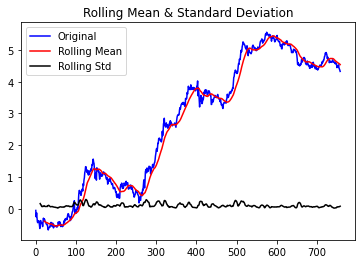

ADF Stastistic: -1.491832
p-value: 0.537548
The graph is non stationery
Critical values:
	1%: -3.439 
	5%: -2.865 
	10%: -2.569 


In [134]:
ts_log = np.log(ts)
test_stationarity(ts_log)

In [135]:
ts_log_diff = ts_log - ts_log.shift()

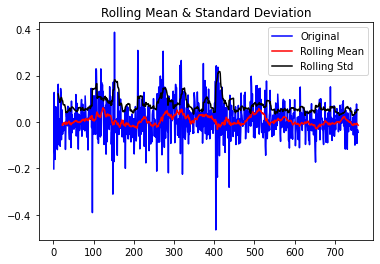

ADF Stastistic: -5.766348
p-value: 0.000001
The graph is stationery
Critical values:
	1%: -3.439 
	5%: -2.865 
	10%: -2.569 


In [136]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [137]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ts_log, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [138]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
8     (2, 2) -1650.225505
5     (1, 2) -1649.178529
7     (2, 1) -1648.936962
3     (1, 0) -1645.288385
1     (0, 1) -1645.144095


In [139]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  759
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 830.113
Date:                Mon, 09 May 2022   AIC                          -1650.226
Time:                        13:14:14   BIC                          -1627.072
Sample:                             0   HQIC                         -1641.308
                                - 759                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7915      0.053     15.001      0.000       0.688       0.895
ar.L2         -0.8565      0.047    -18.294      0.000      -0.948      -0.765
ma.L1         -0.8548      0.041    -21.022      0.0

Printing Predicted vs Expected Values...


predicted = 91.609435,   expected = 96.223488,   error = 4.795142  %
predicted = 95.378732,   expected = 93.297676,   error = 2.230555  %
predicted = 93.463023,   expected = 99.738838,   error = 6.292248  %
predicted = 100.867293,   expected = 109.978981,   error = 8.284936  %
predicted = 111.421786,   expected = 101.837601,   error = 9.411244  %
predicted = 103.146158,   expected = 101.459038,   error = 1.662859  %
predicted = 103.077925,   expected = 112.174248,   error = 8.109100  %
predicted = 111.669916,   expected = 113.894302,   error = 1.953027  %
predicted = 113.820607,   expected = 115.299759,   error = 1.282875  %
predicted = 117.172227,   expected = 117.355148,   error = 0.155870  %
predicted = 118.293171,   expected = 113.595482,   error = 4.135455  %
predicted = 113.080344,   expected = 114.019379,   error = 0.823574  %
predicted = 114.914405,   expected = 106.202805,   error = 8.202797  %
predicted = 107.257177,   expected = 96.

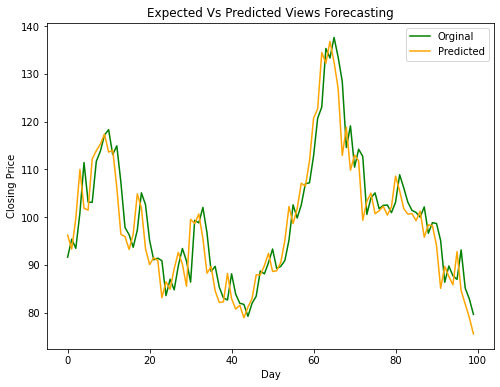

In [140]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 2))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t+size]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [141]:
RMSE_SOL=math.sqrt(mean_squared_error(originals,predictions))
RMSE_SCORES.append(RMSE_SOL)
RMSE_SOL

5.231760912145441

In [142]:
predictions = pd.DataFrame(predictions,index = test_arima.index,columns=['Prediction'])
SOL['Prediction']=predictions

In [143]:
plot(SOL)

In [144]:
#Predicting the next 2 days: 
pred = model_fit.forecast(3)
next_SOL=list(np.exp(pred[0][1:]))
next_days.append(next_SOL)

In [150]:
currencies=['BTC', 'ETH', 'ADA', 'AVAX', 'AXS', 'ATOM', 'LINK', 'LUNA1', 'MATIC','SOL']
data = pd.DataFrame()
data['Currency'] = currencies
data['RMSE_SCORE'] = RMSE_SCORES
data['Next_Days_Predictions']=next_days
data= data.astype({"Next_Days_Predictions": str})
data[['09/05', '10/05']]=data['Next_Days_Predictions'].str.split(',', expand=True)
data['09/05']=data['09/05'].str[1:]
data['10/05']=data['10/05'].str[:-1]
data.pop("Next_Days_Predictions")
data=data.sort_values('Currency')
data

,Currency,RMSE_SCORE,09/05,10/05
2,ADA,0.043508,0.7542218617677818,0.7530182258161798
5,ATOM,1.368854,16.615399118362287,16.628701600410285
3,AVAX,4.150874,54.83842247889163,54.72484862847913
4,AXS,3.349678,29.32464538124191,29.62286507751139
0,BTC,1387.344300,35619.19812621678,35677.965747363196
1,ETH,108.545235,2635.1739447966957,2639.9348058480355
6,LINK,0.677339,10.256339077239883,10.256594122283575
7,LUNA1,5.347421,67.80524913413798,67.82783160627433
8,MATIC,0.077037,1.0264755539230754,1.0346989196448622
9,SOL,5.231761,79.75641633942202,80.16780511427886


In [151]:
data.to_csv('arima_predictions.csv')  